### EDA 2022
by Harsh Vardhan Pachisia

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spark = SparkSession.builder.appName('2022-EDA').getOrCreate()

#change configuration settings on Spark 
conf = spark.sparkContext._conf.setAll([('spark.executor.memory', '4g'), ('spark.app.name', 'Spark Updated Conf'), ('spark.executor.cores', '4'), ('spark.cores.max', '4'), ('spark.driver.memory','4g')])

#print spark configuration settings
spark.sparkContext.getConf().getAll()

:: loading settings :: url = jar:file:/usr/lib/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-59795f9d-11be-4787-8d1a-73a01beaeae5;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;4.4.0 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.828 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.projectlombok#lombok;1.16.8 in central
	found com.google.cloud#google-cloud-storage;2.16.0 in central
	found com.google.guava#guava;31.1-jre in centra

[('spark.stage.maxConsecutiveAttempts', '10'),
 ('spark.dynamicAllocation.minExecutors', '1'),
 ('spark.eventLog.enabled', 'true'),
 ('spark.submit.pyFiles',
  '/root/.ivy2/jars/com.johnsnowlabs.nlp_spark-nlp_2.12-4.4.0.jar,/root/.ivy2/jars/graphframes_graphframes-0.8.2-spark3.1-s_2.12.jar,/root/.ivy2/jars/com.typesafe_config-1.4.2.jar,/root/.ivy2/jars/org.rocksdb_rocksdbjni-6.29.5.jar,/root/.ivy2/jars/com.amazonaws_aws-java-sdk-bundle-1.11.828.jar,/root/.ivy2/jars/com.github.universal-automata_liblevenshtein-3.0.0.jar,/root/.ivy2/jars/com.google.cloud_google-cloud-storage-2.16.0.jar,/root/.ivy2/jars/com.navigamez_greex-1.0.jar,/root/.ivy2/jars/com.johnsnowlabs.nlp_tensorflow-cpu_2.12-0.4.4.jar,/root/.ivy2/jars/it.unimi.dsi_fastutil-7.0.12.jar,/root/.ivy2/jars/org.projectlombok_lombok-1.16.8.jar,/root/.ivy2/jars/com.google.guava_guava-31.1-jre.jar,/root/.ivy2/jars/com.google.guava_failureaccess-1.0.1.jar,/root/.ivy2/jars/com.google.guava_listenablefuture-9999.0-empty-to-avoid-conflict-

In [3]:
df_2022 = spark.read.csv("gs://msca-bdp-student-gcs/bdp-rideshare-project/rideshare/2022", inferSchema=True, header=True)
df_weather = spark.read.csv("gs://msca-bdp-student-gcs/bdp-rideshare-project/weather/chicago 2020-01-01 to 2022-08-31.csv", inferSchema=True, header=True)
df_2022.printSchema()
df_weather.printSchema()

root
 |-- Trip ID: string (nullable = true)
 |-- Trip Start Timestamp: string (nullable = true)
 |-- Trip End Timestamp: string (nullable = true)
 |-- Trip Seconds: integer (nullable = true)
 |-- Trip Miles: double (nullable = true)
 |-- Pickup Census Tract: long (nullable = true)
 |-- Dropoff Census Tract: long (nullable = true)
 |-- Pickup Community Area: integer (nullable = true)
 |-- Dropoff Community Area: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Tip: integer (nullable = true)
 |-- Additional Charges: double (nullable = true)
 |-- Trip Total: double (nullable = true)
 |-- Shared Trip Authorized: boolean (nullable = true)
 |-- Trips Pooled: integer (nullable = true)
 |-- Pickup Centroid Latitude: double (nullable = true)
 |-- Pickup Centroid Longitude: double (nullable = true)
 |-- Pickup Centroid Location: string (nullable = true)
 |-- Dropoff Centroid Latitude: double (nullable = true)
 |-- Dropoff Centroid Longitude: double (nullable = true)
 |-- Dropof

In [4]:
#display number of records by partition
def displaypartitions(df):
    #number of records by partition
    num = df.rdd.getNumPartitions()
    print("Partitions:", num)
    df.withColumn("partitionId", F.spark_partition_id())\
        .groupBy("partitionId")\
        .count()\
        .orderBy(F.asc("count"))\
        .show(num)

df_2022.rdd.getNumPartitions()


135

In [5]:
displaypartitions(df_2022)

Partitions: 135


+-----------+------+
|partitionId| count|
+-----------+------+
|        134|337327|
|         22|499083|
|        123|504285|
|        126|504809|
|        115|504841|
|         95|505099|
|         87|505483|
|         10|505553|
|        129|505717|
|        109|505821|
|         30|506415|
|         12|506815|
|        112|506840|
|        118|506913|
|          8|507499|
|         17|507526|
|         40|507585|
|         53|507693|
|         90|507836|
|         27|507856|
|         71|508094|
|        100|508435|
|        103|508829|
|         74|508860|
|         92|509111|
|        106|509156|
|         50|509316|
|         45|509490|
|         25|509572|
|         79|509585|
|         48|509604|
|         89|509853|
|         32|510003|
|         66|510055|
|         58|510094|
|         82|510167|
|         37|510177|
|         61|510194|
|          6|510259|
|         35|510618|
|         19|510748|
|          4|510798|
|         68|510849|
|         77|510867|
|         97|

Apart from partition ID 134- the rest of them seem to be fine. 

In [7]:
#df_2022 = df_2022.repartition(12)
#displaypartitions(df_2022)

Partitions: 12


+-----------+------+
|partitionId| count|
+-----------+------+
|         11|308198|
|          2|308198|
|          1|308198|
|          0|308199|
|          9|308200|
|         10|308200|
|          7|308200|
|          3|308200|
|          4|308200|
|          6|308200|
|          8|308201|
|          5|308201|
+-----------+------+



In [6]:
df_2022.describe().show()

+-------+--------------------+--------------------+--------------------+-----------------+-----------------+--------------------+--------------------+---------------------+----------------------+------------------+------------------+------------------+------------------+-------------------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+-------------------------+
|summary|             Trip ID|Trip Start Timestamp|  Trip End Timestamp|     Trip Seconds|       Trip Miles| Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area|              Fare|               Tip|Additional Charges|        Trip Total|       Trips Pooled|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid Location|
+-------+--------------------+--------------------+--------------------+-----------------+----------------

**Missing Values**

In [4]:
#Find the number of missing values for each column
from pyspark.sql.functions import isnan, when, count, col
# don't run for loops on the data, running for loops on the columns is fine, doing it on the entire data can cause problems. 
df_2022.select([count(when(df_2022[c].isNull(), c)).alias(c) for c in df_2022.columns]).show()

+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+------+------+------------------+----------+----------------------+------------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+-------------------------+
|Trip ID|Trip Start Timestamp|Trip End Timestamp|Trip Seconds|Trip Miles|Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area|  Fare|   Tip|Additional Charges|Trip Total|Shared Trip Authorized|Trips Pooled|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid Location|
+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+------+------+------------------+----------+-------

<AxesSubplot:>

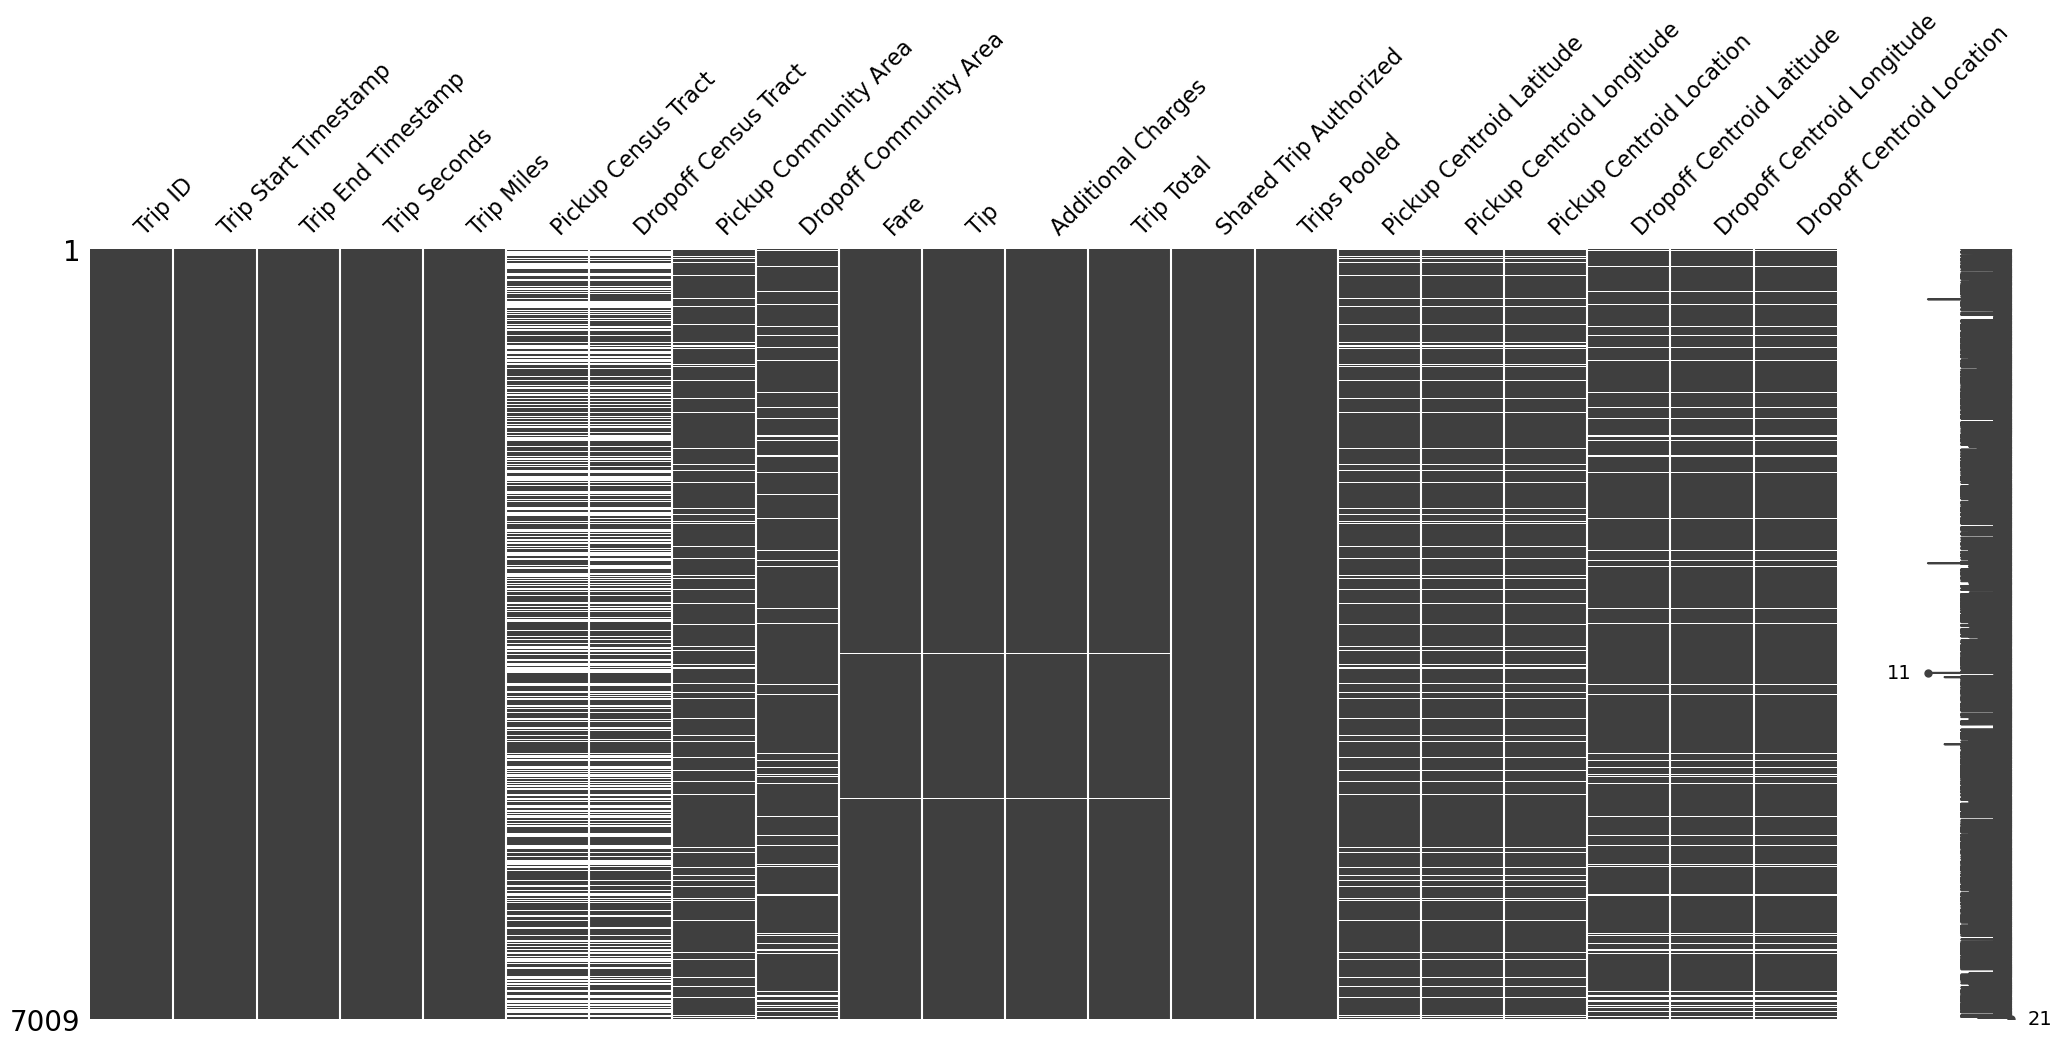

In [5]:
import missingno as msno
%matplotlib inline
msno.matrix(df_2022.sample(fraction=1/10000).toPandas())

In [8]:
#number of trips in 2022
df_2022.distinct().count()

69109780

In [9]:
# number of trips in 2022 without any na's
df_2022.dropna(how='any').count()

37047490

In [27]:
df_2022 = df_2022.dropna(how='any')
df_2022 = df_2022.dropDuplicates()

In [11]:
df_2022.printSchema()

root
 |-- Trip ID: string (nullable = true)
 |-- Trip Start Timestamp: string (nullable = true)
 |-- Trip End Timestamp: string (nullable = true)
 |-- Trip Seconds: integer (nullable = true)
 |-- Trip Miles: double (nullable = true)
 |-- Pickup Census Tract: long (nullable = true)
 |-- Dropoff Census Tract: long (nullable = true)
 |-- Pickup Community Area: integer (nullable = true)
 |-- Dropoff Community Area: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Tip: integer (nullable = true)
 |-- Additional Charges: double (nullable = true)
 |-- Trip Total: double (nullable = true)
 |-- Shared Trip Authorized: boolean (nullable = true)
 |-- Trips Pooled: integer (nullable = true)
 |-- Pickup Centroid Latitude: double (nullable = true)
 |-- Pickup Centroid Longitude: double (nullable = true)
 |-- Pickup Centroid Location: string (nullable = true)
 |-- Dropoff Centroid Latitude: double (nullable = true)
 |-- Dropoff Centroid Longitude: double (nullable = true)
 |-- Dropof

In [12]:
df_2022.show(2, truncate = False)

+----------------------------------------+----------------------+----------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+----+---+------------------+-----------------+----------------------+------------+------------------------+-------------------------+------------------------------------+-------------------------+--------------------------+------------------------------------+
|Trip ID                                 |Trip Start Timestamp  |Trip End Timestamp    |Trip Seconds|Trip Miles|Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area|Fare|Tip|Additional Charges|Trip Total       |Shared Trip Authorized|Trips Pooled|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location            |Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid Location           |
+----------------------------------------+----------------------+-----------------

In [4]:
# Convert 'Trip start timestamp' and 'Trip End Timestamp' columns to timestamp
df_2022 = df_2022.withColumn("Trip Start Timestamp", F.to_timestamp(F.col("Trip Start Timestamp"), "MM/dd/yyyy hh:mm:ss a"))
df_2022 = df_2022.withColumn("Trip End Timestamp", F.to_timestamp(F.col("Trip End Timestamp"), "MM/dd/yyyy hh:mm:ss a"))

In [14]:
df_2022.printSchema()

root
 |-- Trip ID: string (nullable = true)
 |-- Trip Start Timestamp: timestamp (nullable = true)
 |-- Trip End Timestamp: timestamp (nullable = true)
 |-- Trip Seconds: integer (nullable = true)
 |-- Trip Miles: double (nullable = true)
 |-- Pickup Census Tract: long (nullable = true)
 |-- Dropoff Census Tract: long (nullable = true)
 |-- Pickup Community Area: integer (nullable = true)
 |-- Dropoff Community Area: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Tip: integer (nullable = true)
 |-- Additional Charges: double (nullable = true)
 |-- Trip Total: double (nullable = true)
 |-- Shared Trip Authorized: boolean (nullable = true)
 |-- Trips Pooled: integer (nullable = true)
 |-- Pickup Centroid Latitude: double (nullable = true)
 |-- Pickup Centroid Longitude: double (nullable = true)
 |-- Pickup Centroid Location: string (nullable = true)
 |-- Dropoff Centroid Latitude: double (nullable = true)
 |-- Dropoff Centroid Longitude: double (nullable = true)
 |-- 

In [5]:
df_2022 = df_2022.drop('Trips Pooled','Additional Charges','Shared Trip Authorized', "Tip")
df_2022 = df_2022.withColumnRenamed("Trip ID","ID").withColumnRenamed("Trip Start Timestamp","start_timestamp").withColumnRenamed("Trip End Timestamp","end_timestamp").withColumnRenamed("Trip Miles",\
                "miles").withColumnRenamed("Pickup Census Tract","pickup_tract").withColumnRenamed("Dropoff Census Tract","dropoff_tract").withColumnRenamed("Pickup Community Area","pickup_area"\
                ).withColumnRenamed("Dropoff Community Area","dropoff_area").withColumnRenamed("Trip Total","total").withColumnRenamed("Pickup Centroid Latitude","pickup_lat").withColumnRenamed(\
                "Pickup Centroid Longitude","pickup_lon").withColumnRenamed("Pickup Centroid Location","pickup_location").withColumnRenamed("Dropoff Centroid Latitude","dropoff_lat").withColumnRenamed(\
                "Dropoff Centroid Longitude","dropoff_lon").withColumnRenamed("Dropoff Centroid Latitude", "dropoff_lat").withColumnRenamed("Trip Seconds", "trip_seconds").withColumnRenamed("Dropoff Centroid Location", "dropoff_location").withColumnRenamed("Fare", "fare")

In [6]:
df_2022.printSchema()

root
 |-- ID: string (nullable = true)
 |-- start_timestamp: timestamp (nullable = true)
 |-- end_timestamp: timestamp (nullable = true)
 |-- trip_seconds: integer (nullable = true)
 |-- miles: double (nullable = true)
 |-- pickup_tract: long (nullable = true)
 |-- dropoff_tract: long (nullable = true)
 |-- pickup_area: integer (nullable = true)
 |-- dropoff_area: integer (nullable = true)
 |-- fare: double (nullable = true)
 |-- total: double (nullable = true)
 |-- pickup_lat: double (nullable = true)
 |-- pickup_lon: double (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- dropoff_lat: double (nullable = true)
 |-- dropoff_lon: double (nullable = true)
 |-- dropoff_location: string (nullable = true)



In [9]:
df_weather = df_weather.withColumn('datetime',F.to_date(df_weather['datetime'], "yyyy-mm-dd"))

In [10]:
df_2022 = df_2022.withColumn('date_only', F.to_date(df_2022.end_timestamp))
#df_2022.select('end_timestamp').distinct().show(10)

In [11]:
# add the month column
df_2022 = df_2022.withColumn('month', F.month(df_2022.start_timestamp))
df_2022 = df_2022.withColumn('hour', F.hour(df_2022.start_timestamp))

In [12]:
# get rides that occurred within hyde park
# add kenwood and woodlawn to this list - only if the other location is hyde park                    
df_hp = df_2022.filter((df_2022.pickup_area == 41) & (df_2022.dropoff_area == 41))
df_kw = df_2022.filter(((df_2022.pickup_area == 41) & (df_2022.dropoff_area == 42)) | ((df_2022.pickup_area == 42) & (df_2022.dropoff_area == 41)))
df_wl = df_2022.filter(((df_2022.pickup_area == 41) & (df_2022.dropoff_area == 39)) | ((df_2022.pickup_area == 39) & (df_2022.dropoff_area == 41)))
df_area = df_hp.union(df_kw).union(df_wl)

In [13]:
df_area.show(5)

+--------------------+-------------------+-------------------+------------+-----+------------+-------------+-----------+------------+----+-----+------------+-------------+--------------------+------------+-------------+--------------------+----------+-----+----+
|                  ID|    start_timestamp|      end_timestamp|trip_seconds|miles|pickup_tract|dropoff_tract|pickup_area|dropoff_area|fare|total|  pickup_lat|   pickup_lon|     pickup_location| dropoff_lat|  dropoff_lon|    dropoff_location| date_only|month|hour|
+--------------------+-------------------+-------------------+------------+-----+------------+-------------+-----------+------------+----+-----+------------+-------------+--------------------+------------+-------------+--------------------+----------+-----+----+
|2e4b382f14613d0eb...|2022-01-01 00:00:00|2022-01-01 00:00:00|         263|  1.1|        null|         null|         41|          41| 5.0| 7.58|41.794090253|-87.592310855|POINT (-87.592310...|41.794090253|-87.59

AnalysisException: path gs://msca-bdp-student-gcs/bdp-rideshare-project/rideshare/processed_data/2022 already exists.

<AxesSubplot:xlabel='month'>

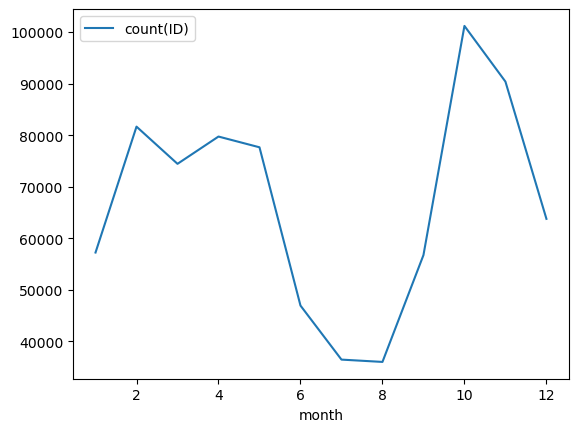

In [14]:
df_area.groupby("month").agg({'ID':'count'}).orderBy(F.col('month').asc()).toPandas().plot(x="month",y="count(ID)")

In [15]:
from pyspark.sql.functions import approxCountDistinct

df_area.select(approxCountDistinct("ID", rsd = 0.05)).show()

23/11/14 14:47:52 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------------------------+
|approx_count_distinct(ID)|
+-------------------------+
|                   858074|
+-------------------------+



**Rides per hour**

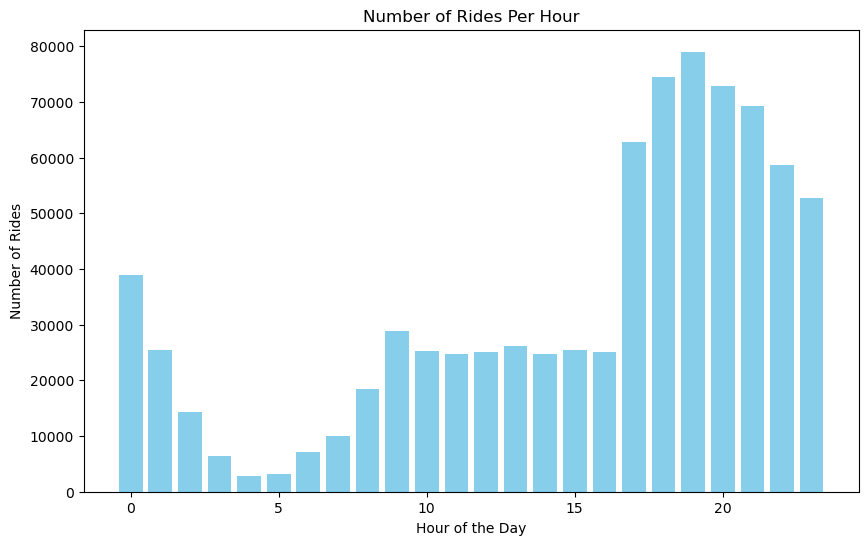

In [16]:
# rides per hour:
rides_per_hour = df_area.groupBy("hour").count().orderBy("hour")

# Convert the result to Pandas for local plotting
rides_per_hour_pd = rides_per_hour.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(rides_per_hour_pd["hour"], rides_per_hour_pd["count"], color="skyblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Per Hour")
plt.show()

See a substanial increase in number of rides taking place during program hours. A sizeable jump happens the moment the program starts.

**Filter the in-area dataframe to only include rides with a fare under 15, and rides within the timeframe for the given year.**

In [17]:
df_area_program = df_area.filter((df_area.fare <= 15.0) & ((df_area.hour >= 17) | (df_area.hour < 4)))

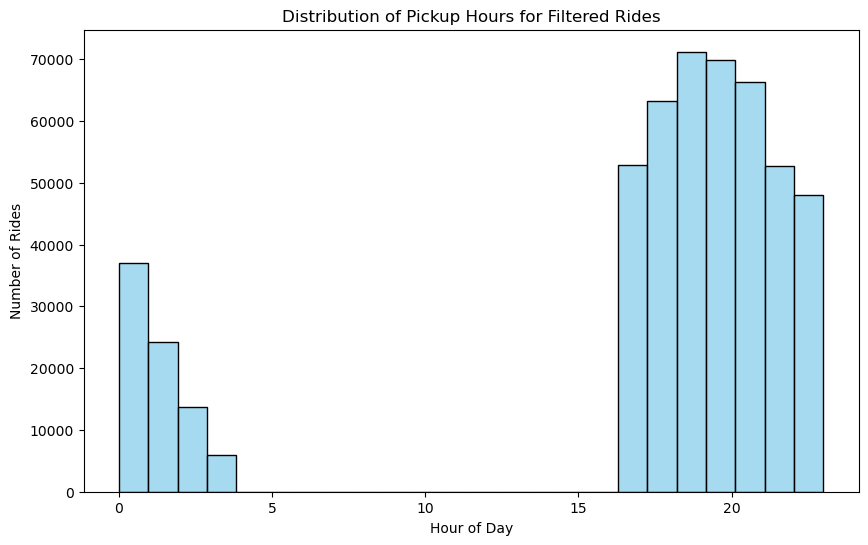

In [18]:
import seaborn as sns

df_area_program_pd = df_area_program.toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(df_area_program_pd['hour'], bins=24, kde=False, color='skyblue')
plt.title('Distribution of Pickup Hours for Filtered Rides')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()


In [25]:
#pip install folium

Note: you may need to restart the kernel to use updated packages.


**heat map of dropoff location and pickup location (for in-program rides)**

In [29]:
import folium
from folium.plugins import HeatMap

#!pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 71.2 MB/s eta 0:00:00:00:0100:01


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming you have a Pandas DataFrame for in-program rides
df_area_program_pd = df_area_program.toPandas()

# Create a figure using plotly express
fig = px.scatter_mapbox(df_area_program_pd, 
                        lat='pickup_lat', lon='pickup_lon',
                        color_discrete_sequence=["blue"], 
                        zoom=10)

# Add dropoff locations as scatter points on the map
fig.add_trace(px.scatter_mapbox(df_area_program_pd, 
                                lat='dropoff_lat', lon='dropoff_lon',
                                color_discrete_sequence=["red"]).data[0])

# Update the map layout
fig.update_layout(mapbox_style="carto-positron", 
                  mapbox_zoom=10, 
                  margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Show the figure
fig.show()


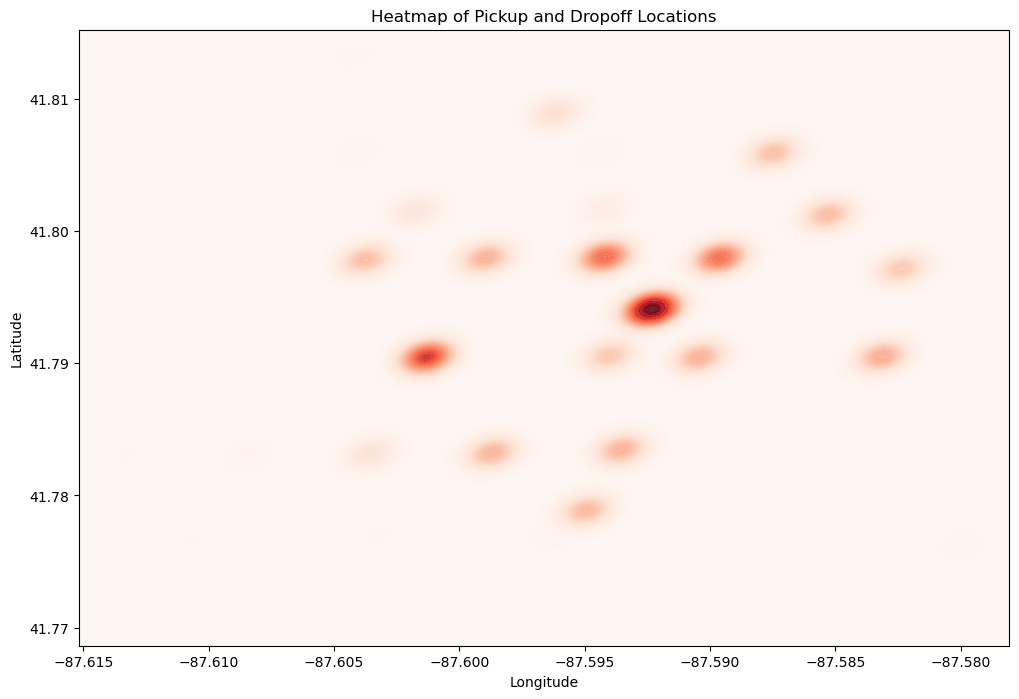

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_area_program_pd = df_area_program.toPandas()

# Create a 2D kernel density estimate plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_area_program_pd, x='pickup_lon', y='pickup_lat', cmap='Blues', fill=True, thresh=0, levels=100, alpha=0.8)
sns.kdeplot(data=df_area_program_pd, x='dropoff_lon', y='dropoff_lat', cmap='Reds', fill=True, thresh=0, levels=100, alpha=0.8)

plt.title('Heatmap of Pickup and Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

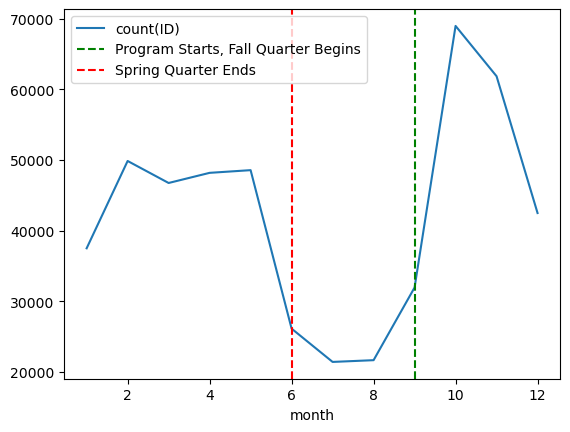

In [19]:
import matplotlib.pyplot as plt
df_count_plot_program = df_area_program.groupby("month").agg({'ID':'count'}).orderBy(F.col('month').asc()).toPandas() #.plot(x="month",y="count(ID)")
ax = df_count_plot_program.plot(x="month", y="count(ID)")
ax.axvline(x=9, color='g', linestyle='--', label='Fall Quarter Begins')
ax.axvline(x=6, color='r', linestyle='--', label='Spring Quarter Ends')
plt.legend()
plt.show()

<AxesSubplot:xlabel='month'>

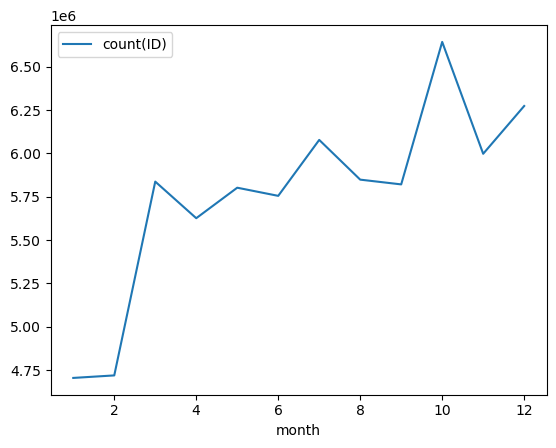

In [21]:
# basic plots for all rides (not just in the program area)
df_2022.groupby("month").agg({'ID':'count'}).orderBy(F.col('month').asc()).toPandas().plot(x="month")

In [22]:
df_total = df_2022.groupby("pickup_area").agg({'ID':'count'}).orderBy(F.col('pickup_area').asc()).toPandas()

<Figure size 1000x1000 with 0 Axes>

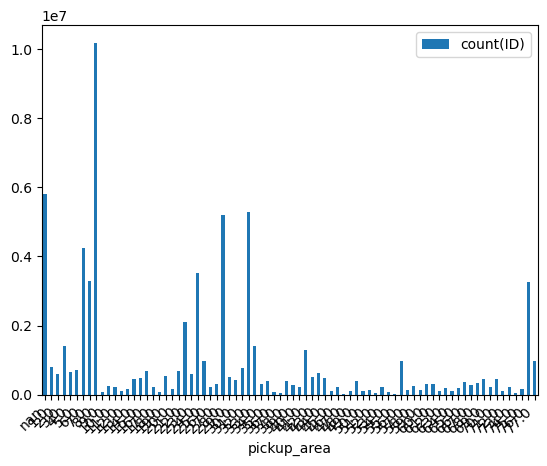

In [23]:
%matplotlib inline
plt.figure(figsize=(10, 10))
ax = df_total.plot(x="pickup_area",y="count(ID)", kind='bar')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

<AxesSubplot:xlabel='dropoff_area'>

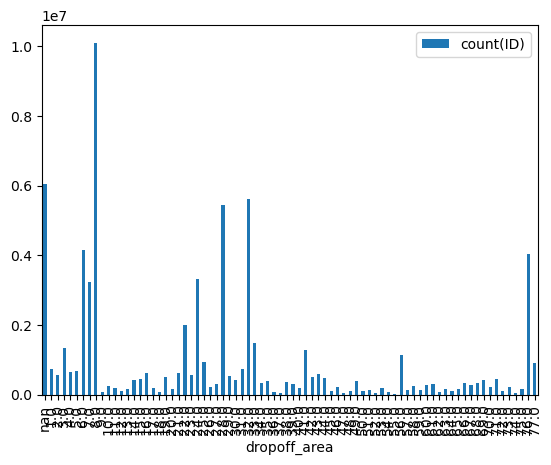

In [24]:
df_2022.groupby("dropoff_area").agg({'ID':'count'}).orderBy(F.col('dropoff_area').asc()).toPandas().plot(x="dropoff_area",y="count(ID)", kind='bar')

In [33]:
# storing data on the bucket
df_area_program.write.option("header", "true").csv("gs://msca-bdp-student-gcs/bdp-rideshare-project/rideshare/processed_data/program_area_time_rides_2022.csv")

### Next Steps

the geospatial ipynb (notebook 4.8) from ashish shows some ways to work with this kind of data in pyspark

Plot Cloropleths (for all of chicago)

heat map of dropoff location and pickup location (for in-program rides)

add vertical lines at and key shifts in the program policy